## Example os sample reduction analisys by target
### 1. Loading the data

Let's import the `BasinData` object class to store data from a basin's sediment sources. An instance of BasinData should be created, and the data should be loaded from a file. 

In [1]:
# If you don't have PySASF instaled, you need set the directory:
import sys
sys.path.append('/home/tiagoburiol/PySASF')

In [2]:
from pysasf.basindata import BasinData

In [3]:
database = BasinData("../data/arvorezinha_database.xlsx")

Once the file is loaded, some information and statistics can be visualized, as shown in the following examples.

In [4]:
database.infos()

Sample Sizes,Fe,Mn,Cu,Zn,Ca,K,P
C,9,9,9,9,9,9,9
E,9,9,9,9,9,9,9
L,20,20,20,20,20,20,20
Y,24,24,24,24,24,24,24


In [5]:
database.means()

Means,Fe,Mn,Cu,Zn,Ca,K,P
C,6.21,1470.45,18.23,79.71,165.23,3885.12,0.03
E,6.76,811.95,23.28,86.02,76.10,3182.27,0.01
L,6.63,1854.05,20.05,88.28,159.17,6572.31,0.06
Y,6.16,1119.02,30.92,99.66,276.47,9445.76,0.07


In [6]:
database.std()

STD,Fe,Mn,Cu,Zn,Ca,K,P
C,0.48,548.49,2.41,7.84,82.19,1598.45,0.01
E,0.98,399.90,1.98,6.96,26.21,948.95,0.01
L,1.07,399.77,3.86,15.70,79.33,2205.99,0.01
Y,1.01,294.13,10.13,8.40,79.37,2419.21,0.02


### 2. Calculating proportions for all combinations and finding the feasible solutions

Now we will calculate and save in a file all the possible combinations of proportions contributed by the sediment sources. The routine `calculate_and_save_all_proportions()` will create two files: one for all possible combinations for each sample in the database, saving their indexes, and another file for the corresponding proportions. The default method for calculation is ordinary least squares. Other methods can be chosen using `.set_solver_option(option)`. 

To set your output folder using `basedata.set_output_folder(path='/yourpath/folder')`

In [7]:
database.set_output_folder('../output')

Setting output folder as: ../output
Folder to save output files is: '../output'.


In [8]:
database.calculate_and_save_all_proportions(load=False, format='gzip')

Done! Time processing: 1.9004411697387695
Total combinations: 38880 , shape of proportions: (38880, 3)
Saving combinations indexes in: ../output/C9E9L20Y24_combs.gzip
Saving proportions calculated in: ../output/C9E9L20Y24_props.gzip
Feasebles boolean array is saded in: ../output/C9E9L20Y24_feas.gzip
Time for save files: 0.07124590873718262


If you want to store the proportions solutions and the combination indexes, you can choose `load=True`(is the defoult option) when call the rotine above. The proportions solutions and the combination indexes wil be  stored on `BasinData`object class.

For read the files created and load proportions solutions and the combination indexes we can use the `load_combs_and_props_from_files(combs_file, props_file)` function. A example is showed below.

In [9]:
combs, Ps = database.load_combs_and_props_from_files(database.output_folder+'/C9E9L20Y24_combs.gzip',
                                                     database.output_folder+'/C9E9L20Y24_props.gzip')

Loading combs and props files from: ../output


In [10]:
is_feas = database.load_feasebles_from_file(database.output_folder+'/C9E9L20Y24_feas.gzip')

Loading feasebles proportion indexes from: ../output


We can verify the loaded array data as follows:

In [11]:
display(combs, Ps)

array([[ 0,  0,  0,  0],
       [ 0,  0,  0,  1],
       [ 0,  0,  0,  2],
       ...,
       [ 8,  8, 19, 21],
       [ 8,  8, 19, 22],
       [ 8,  8, 19, 23]], dtype=uint16)

array([[ 0.4450376 , -0.29766154,  0.85262394],
       [ 0.3761485 ,  0.12799704,  0.49585447],
       [ 0.3453723 ,  0.12478452,  0.52984315],
       ...,
       [ 0.49628267, -0.00805024,  0.51176757],
       [ 0.421166  , -0.66756773,  1.2464017 ],
       [-0.06792153, -0.13803147,  1.205953  ]], dtype=float32)

The solutions considered feasible are those in which $P_i>0$. 

In [12]:
print("The total number of solution is:", len(Ps))
print("The number of feasible solution is:", len(Ps[database.feas]))

The total number of solution is: 38880
The number of feasible solution is: 8132


### 3. Confidence region and randon subsamples from stat.py

A confidence region can be calculated in 2 dimentions using, for example, the $95 \%$ points closest to the feaseble proportions average using Mahalanobis's distances until the mean of feaseble proportions. A more detailed explanation can be can be obtained in the Clarke and Minella's paper.

The `stat` module  implement a function for get a confidence region, as can be seen in the example below.

In [13]:
from pysasf import stats

In [14]:
subset = stats.random_props_subset(Ps[database.feas], 500)

In [15]:
Pcr = stats.confidence_region(subset[:,0:2], space_dist='mahalanobis')
print("The total number of points in 95% confidence region is:", len(Pcr))

The total number of points in 95% confidence region is: 475


Lets draw the confidence region usin the `draw_hull(pts)` function from `plots`module.

Please, set a path to save the convex hull figure.


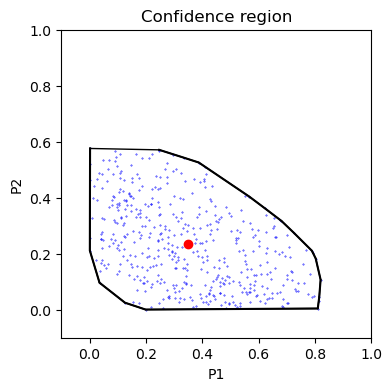

In [16]:
from pysasf import plots
plots.draw_hull(Pcr, title = 'Confidence region')

### 4. Processing data from reductions and repetitions 

As a result of Clarke and Minella's article presents 
table and graphs of average values ​​for 50 repetitions taking
subsamples of different sizes drawn from each sample set.
A 95% confidence regions are calculated for each sample reduction and the proportions $P_1$ and $P_2$,
along with the standard deviations is calculated.

De full analysis can be repreduced and customized using the routine `run_repetitions_and_reduction (basindata, source_key, list_of_reductions,repetitions=50)`. The results is saved in a `csv`file an can be stored and load later. A example is showed below.

In [17]:
import pysasf.clarkeminella as cm

In [18]:
database.output_folder

'../output'

In [19]:
database.filename

'/C9E9L20Y24'

In [20]:
name = database.filename

for idx in range(24):
    print("Running target:",idx)
    database.filename = 'target'+str(idx) 
    df_CB = cm.run_repetitions_and_reduction (database, 'C',[10,20,40,60,80,100], percents = True, target=idx)
    df_UR = cm.run_repetitions_and_reduction (database, 'E',[10,20,40,60,80,100], percents = True, target=idx)
    df_CF = cm.run_repetitions_and_reduction (database, 'L',[10,20,40,60,80,100], percents = True, target=idx)
    

Time for all runs: 0.6471490859985352
Saving in target23_L-2-4-8-12-16-20.csv


In [21]:
from pysasf import plots

for idx in range(24):
    files = [database.output_folder+'/'+'target'+str(idx)+'_C-1-2-4-5-7-9.csv',
             database.output_folder+'/'+'target'+str(idx)+'_E-1-2-4-5-7-9.csv',
             database.output_folder+'/'+'target'+str(idx)+'_L-2-4-8-12-16-20.csv']
    
    name = 'target'+str(idx)
    plots.plot_cm_outputs(files, 'nSamp', 'CV', savefig=True, fname= name)

Plot figure saved in: ../output/target0.png
Plot figure saved in: ../output/target1.png
Plot figure saved in: ../output/target2.png
Plot figure saved in: ../output/target3.png
Plot figure saved in: ../output/target4.png
Plot figure saved in: ../output/target5.png
Plot figure saved in: ../output/target6.png
Plot figure saved in: ../output/target7.png
Plot figure saved in: ../output/target8.png
Plot figure saved in: ../output/target9.png
Plot figure saved in: ../output/target10.png
Plot figure saved in: ../output/target11.png
Plot figure saved in: ../output/target12.png
Plot figure saved in: ../output/target13.png
Plot figure saved in: ../output/target14.png
Plot figure saved in: ../output/target15.png
Plot figure saved in: ../output/target16.png
Plot figure saved in: ../output/target17.png
Plot figure saved in: ../output/target18.png
Plot figure saved in: ../output/target19.png
Plot figure saved in: ../output/target20.png
Plot figure saved in: ../output/target21.png
Plot figure saved in